# SVM: Maximum margin separating hyperplane

Plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machine classifier with
linear kernel.

Based on the code at: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

Create 40 separable points:

In [4]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [7]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plot the results:

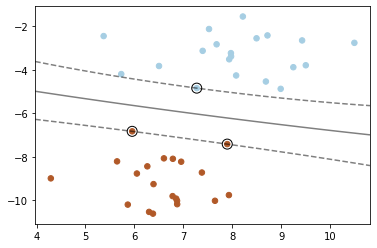

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()